In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy
import math

1)

(a) Defina la función $f(x)=|x^2+2x-4|$.

In [2]:
def f(x):
    return np.abs(x**2+2*x-4)

(b) Dibuje la función $f(x)$ en el intervalo $[-4,0]$ y la recta que une los puntos $(-4,\,f(4))$ y $(0,\,f(0))$

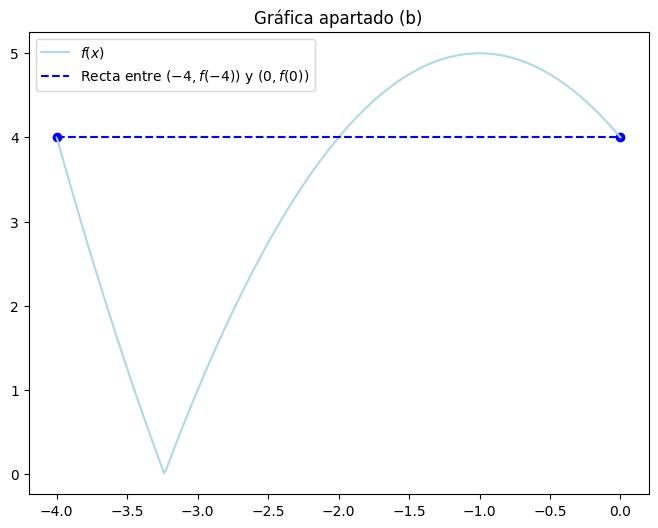

In [3]:
x = np.linspace(-4, 0, 400)

intervalo_1 = [-4, 0]
intervalo_2 = [f(-4), f(0)]

plt.figure(figsize=(8,6))
plt.plot(x, f(x), color='lightblue', label=r'$f(x)$')
plt.scatter(intervalo_1, intervalo_2, color='b')
plt.plot(intervalo_1, intervalo_2, label=r'Recta entre $(-4, f(-4))$ y $(0, f(0))$', linestyle='--', color='b')
plt.legend()
plt.grid(False)
plt.title("Gráfica apartado (b)")
plt.show()


(c) Calcule todos los puntos que verifican el teorema del valor medio en dichas condiciones y dibuje las rectas tangentes a la función $f$ en dichos puntos

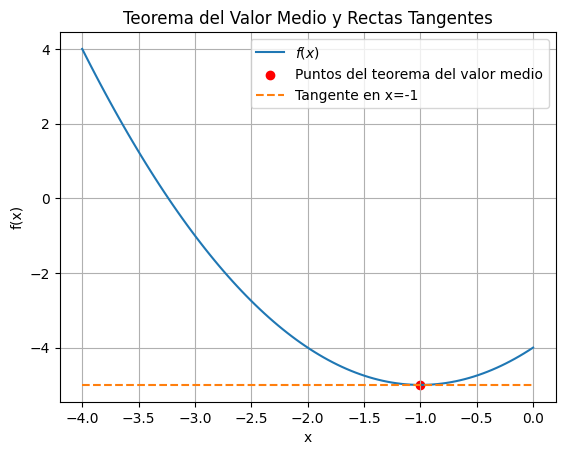

In [4]:
x = sy.symbols('x')
f = x**2+2*x-4

f_prima = sy.diff(f, x)
puntos_criticos = sy.solve(f_prima, x)

puntos = [punto for punto in puntos_criticos if intervalo_1[0] <= punto <= intervalo_1[1]]

teorema_puntos = [(punto, f.evalf(subs={x: punto})) for punto in puntos]

pendiente_tangente = [f_prima.evalf(subs={x: punto}) for punto in puntos]

x_vals = np.linspace(-4, 0, 100)
y_vals = [f.evalf(subs={x: y}) for y in x_vals]

plt.plot(x_vals, y_vals, label=r'$f(x)$')
plt.scatter(*zip(*teorema_puntos), color='red', label='Puntos del teorema del valor medio')

for punto, max in zip(teorema_puntos, pendiente_tangente):
    tangent_line = lambda x: max * (x - punto[0]) + punto[1]
    plt.plot(x_vals, [tangent_line(val) for val in x_vals], '--', label=f'Tangente en x={punto[0]}')

plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Teorema del Valor Medio y Rectas Tangentes')
plt.grid(True)
plt.show()

2. Calcule los intervalos de crecimiento, extremos relativos (si los hay) e intervalos de concavidad y convexidad de la función: $$f(x)=e^x\sqrt{2x^2-4x}.$$ Dibuje la función y compruebe que los datos se corresponden con los resultados previamente obtenidos.

C:\Users\fcoja\AppData\Local\Temp\ipykernel_14628\1533358649.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.exp(x) * np.sqrt(2*x**2 - 4*x)


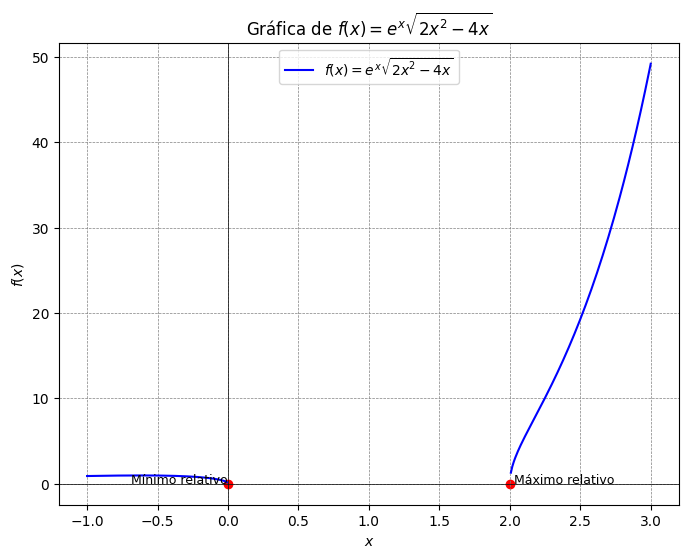

In [5]:
def f(x):
    return np.exp(x) * np.sqrt(2*x**2 - 4*x)

x_vals = np.linspace(-1, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$f(x)=e^x\sqrt{2x^2-4x}$', color='blue')

plt.scatter([0, 2], [f(0), f(2)], color='red')

plt.text(0, f(0), ' Mínimo relativo', fontsize=9, ha='right')
plt.text(2, f(2), ' Máximo relativo', fontsize=9, ha='left')

plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title(r'Gráfica de $f(x)=e^x\sqrt{2x^2-4x}$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.legend()
plt.show()

3. Dada la curva $2x^3+2y^3-9xy=0$

a) Dibuje la curva

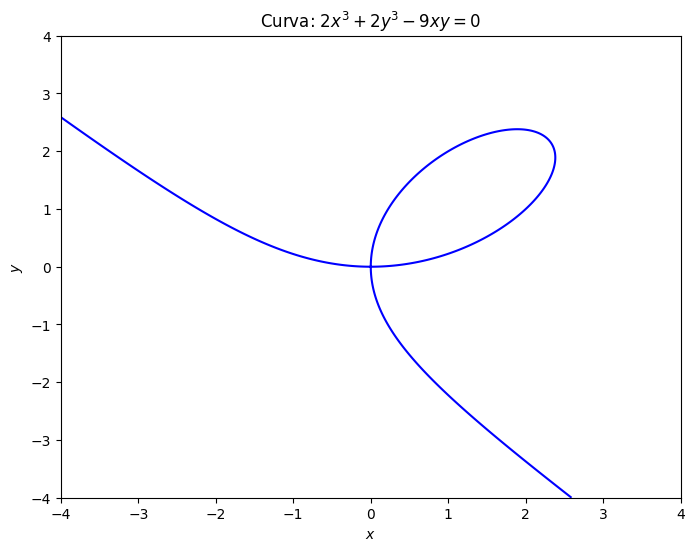

In [6]:
def curva(x,y):
    return 2*x**3+2*y**3-9*x*y

x = np.linspace(-4,4,400)
y = np.linspace(-4,4,400)

x, y = np.meshgrid(x,y)

points = curva(x, y)

plt.figure(figsize=(8,6))
plt.contour(x, y, points, levels=[0], colors='b')
plt.title(r'Curva: $2x^3+2y^3-9xy=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

b) Halle la ecuación de la línea tangente en el punto (2,1). Dibuje la línea tangente en los mismos ejes de la curva.

Ecuación del plano tangente en el punto (2,1) = (-9*x + 6*y**2)*(y - 1) + (x - 2)*(6*x**2 - 9*y)


C:\Users\fcoja\AppData\Local\Temp\ipykernel_14628\1393554251.py:28: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x_vals, y_vals, z_vals, levels=[0], colors='c', label='Curva')
C:\Users\fcoja\AppData\Local\Temp\ipykernel_14628\1393554251.py:32: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(x_vals, y_vals, tangente_line(x_vals, y_vals), levels=[0], colors='m', label='Tangente')


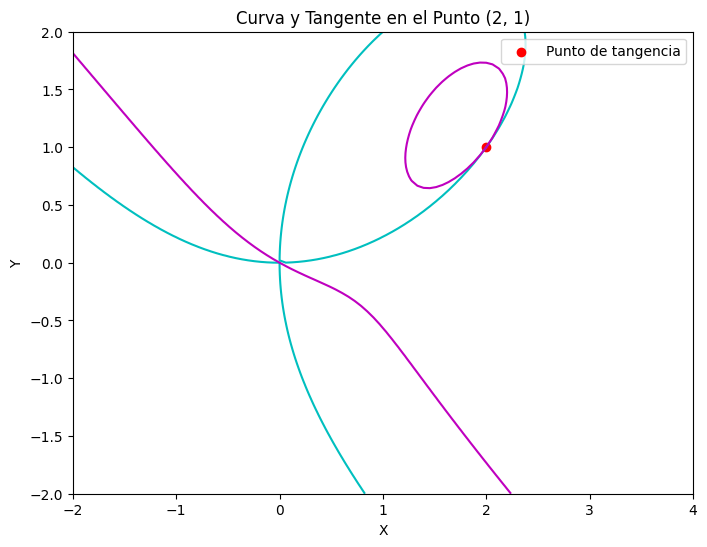

In [7]:
x_0 = 2
y_0 = 1

def derivada_x(x,y):
    x, y = sy.symbols('x, y')
    f = curva(x,y)
    return sy.diff(f,x)

def derivada_y(x,y):
    x, y = sy.symbols('x, y')
    f = curva(x,y)
    return sy.diff(f,y)

x, y = sy.symbols('x, y')

# Ecuación del plano tangente: z - f(x_0,y_0) = f_x(x_0,y_0)(x-x_0)+f_y(x_0,y_0)(y-y_0)

z = (derivada_x(x_0,y_0)*(x-x_0)+derivada_y(x_0,y_0)*(y-y_0)) + curva(x_0, y_0)

print(f"Ecuación del plano tangente en el punto (2,1) = {z}")

x_vals = np.linspace(-2, 4, 100)
y_vals = np.linspace(-2, 2, 100)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = curva(x_vals, y_vals)

plt.figure(figsize=(8, 6))
plt.contour(x_vals, y_vals, z_vals, levels=[0], colors='c', label='Curva')
plt.scatter(x_0, y_0, color='r', marker='o', label='Punto de tangencia')

tangente_line = sy.lambdify((x, y), z, 'numpy')
plt.contour(x_vals, y_vals, tangente_line(x_vals, y_vals), levels=[0], colors='m', label='Tangente')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Curva y Tangente en el Punto (2, 1)')
plt.show()



4. Considere la función $f(x)=\sqrt[5]{x}$. Calcule una aproximación de $\sqrt[5]{33}$ utilizando el polinomio de Taylor de grado 4 asociado a la función $f$ en $x_0=32$. Utilizando la fórmula del error estime el grado $n$ del polinomio para que el error sea menor que $10^{-8}$.

In [8]:
x = sy.symbols('x')
f = x**(1/5)

derivada_f = sy.diff(f, x)
derivada2_f = sy.diff(derivada_f, x)
derivada3_f = sy.diff(derivada2_f, x)
derivada4_f = sy.diff(derivada3_f, x)

x_0 = 32
fx_0 = f.subs(x,x_0)
derivada_fx_0 = derivada_f.subs(x,x_0)
derivada2_fx_0 = derivada2_f.subs(x,x_0)
derivada3_fx_0 = derivada3_f.subs(x,x_0)
derivada4_fx_0 = derivada4_f.subs(x,x_0)

taylor = sy.series(f, x, x0=x_0, n=5)

In [9]:
taylor

1.6 - 0.00015625*(x - 32)**2 + 2.9296875e-6*(x - 32)**3 - 6.40869140625e-8*(x - 32)**4 + 0.0125*x + O((x - 32)**5, (x, 32))

In [10]:
# Aproximación de sqrt[5]{33}

print(f"Aproximación de sqrt[5]{33} usando polinomio de Taylor de grado 4: {taylor.subs(x,33)}")

# Calculo del error

n = 4
z = sy.symbols('z')
resto = sy.diff(f, x, n+1).subs(x, z)/(sy.factorial(n+1))*(33 - x_0)**(n+1)
error = resto.subs(z, x_0)

print(f"Error: {error}")


Aproximación de sqrt[5]33 usando polinomio de Taylor de grado 4: O(1)
Error: 1.52206420898438E-9


5. 

a) Resolver de manera aproximada por el método de Newton las ecuaciones siguientes:
1. $\cos(x)=x$, con dos cifras decimales exactas. Punto de inicio: $x_0=0.5$.
2. $4x^3-14x-2=0$, con tres iteraciones. Punto de inicio: $x_0=2$.

In [11]:
def newton(eq, x0, tol=True, max_iter=True):
    x = sy.symbols('x')
    f = sy.lambdify(x, eq, 'numpy')
    derivada_f  = sy.lambdify(x, sy.diff(eq, x), 'numpy')
    x_k = x0
    iteraciones = 0

    while iteraciones < max_iter:
        x_k1 = x_k - f(x_k) / derivada_f(x_k)

        if np.abs(x_k1 - x_k) < tol:
            return x_k1
        else:
            x_k = x_k1
            iteraciones += 1
    
    raise ValueError("El método de Newton no converge después de {} iteraciones".format(max_iter))

x = sy.symbols('x')

# Apartado 1

print(f"Solución para cos(x) - x = {round(newton(sy.cos(x) - x, 0.5), 2)}")

# Apartado 2

print(f"Solución para 4x**3-14x-2 = {round(newton(4*x**3-14*x-2, 0.5, max_iter=3), 2)}")

Solución para cos(x) - x = 0.76
Solución para 4x**3-14x-2 = -0.27


b) Utilizando método de la bisección calcule una aproximación de los puntos anteriores con un error menor que $10^{-5}$

In [12]:
def biseccion(eq, a, b, tol=True, max_iter=True):
    x = sy.symbols('x')
    f = sy.lambdify(x, eq, 'numpy')

    if f(a) * f(b) > 0:
        raise ValueError("La función no cambia de signo en el intervalo dado.")

    iteracciones = 0
    while (b - a) / 2 > tol and iteracciones < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c  # Encontramos una solución exacta
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iteracciones += 1

    return (a + b) / 2

# Apartado 1
eq1 = sy.cos(x) - x
a1, b1 = 0, 1 
print(f"Aproximación para cos(x) - x con bisección: {round(biseccion(eq1, a1, b1, tol=1e-5), 5)}")

# Apartado 2
eq2 = 4 * x**3 - 14 * x - 2
a2, b2 = 1, 3 
print(f"Aproximación para 4x**3 - 14x - 2 = 0 con bisección: {round(biseccion(eq2, a2, b2, tol=1e-5), 5)}")

Aproximación para cos(x) - x con bisección: 0.75
Aproximación para 4x**3 - 14x - 2 = 0 con bisección: 1.5
